In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from data import dataset as ds
from data import test_dataset as t_ds
from preprocessing import constants as const

In [2]:
training_dataset = ds.Dataset(const.TRAINING_PATH, name="Training", include_augmented=True, height=400, width=400, batch_size=30)
t_ds.test_labels(training_dataset, "Train")

Training Dataset contains 13608 total images.
Training Dataset contains 9855 augmented images.
####################
Processing labels...
####################

including augmented images...
Done processing labels.
~~~~~~~~~~~~
    Train
~~~~~~~~~~~~
optotypes:  ['+blank' '+circle' '+diamond' '+square' '2' '3' '5' '6' '8' '9' 'C' 'D'
 'E' 'F' 'H' 'K' 'L' 'LgradientCircle' 'LregularCircle' 'MgradientCircle'
 'MregularCircle' 'N' 'O' 'P' 'R' 'S' 'SgradientCircle' 'SregularCircle'
 'T' 'V' 'Z' 'apple' 'bird' 'cake' 'car' 'circle' 'cow' 'cup' 'duck'
 'flat-line' 'flat-square' 'frown-line' 'frown-square' 'grayCircle' 'hand'
 'horse' 'house' 'panda' 'phone' 'smile-line' 'smile-square' 'square'
 'star' 'train' 'tree' 'x-blank' 'x-circle' 'x-diamond' 'x-square']
angles:  [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  225.  270.  315. ]
image sizes:  ['L' 'S']
distortions:  ['low']


AssertionError: 

In [3]:
def test_label(dataset_attribute, constant_attribute, size=None):
    assert np.all(dataset_attribute == constant_attribute)
    if size:
        assert np.size(dataset_attribute) == size

print(np.unique(training_dataset.optotypes))
print(np.unique(training_dataset.acuities))
# test_label(np.unique(training_dataset.optotypes), np.array(const.optotypes))

['+blank' '+circle' '+diamond' '+square' '2' '3' '5' '6' '8' '9' 'C' 'D'
 'E' 'F' 'H' 'K' 'L' 'LgradientCircle' 'LregularCircle' 'MgradientCircle'
 'MregularCircle' 'N' 'O' 'P' 'R' 'S' 'SgradientCircle' 'SregularCircle'
 'T' 'V' 'Z' 'apple' 'bird' 'cake' 'car' 'circle' 'cow' 'cup' 'duck'
 'flat-line' 'flat-square' 'frown-line' 'frown-square' 'grayCircle' 'hand'
 'horse' 'house' 'panda' 'phone' 'smile-line' 'smile-square' 'square'
 'star' 'train' 'tree' 'x-blank' 'x-circle' 'x-diamond' 'x-square']
['A' 'C' 'E' 'ETDRS' 'ETL-face' 'ETL-x' 'HOTV' 'L' 'NL' 'NPV' 'P' 'SSa'
 'SSl' 'Teller' 'W']


In [9]:
testing_dataset = ds.Dataset(const.TESTING_PATH, name="Testing", height=400, width=400, batch_size=30)
t_ds.test_labels(testing_dataset, "Test")

Testing Dataset contains 12834 total images.
Testing Dataset contains 0 augmented images.
####################
Processing labels...
####################
Done processing labels.
~~~~~~~~~~~~
    Test
~~~~~~~~~~~~
optotypes:  ['+blank' '+circle' '+diamond' '+square' '2' '3' '5' '6' '8' '9' 'C' 'D'
 'E' 'F' 'H' 'K' 'L' 'LgradientCircle' 'LregularCircle' 'MgradientCircle'
 'MregularCircle' 'N' 'O' 'P' 'R' 'S' 'SgradientCircle' 'SregularCircle'
 'T' 'V' 'Z' 'apple' 'bird' 'cake' 'car' 'circle' 'cow' 'cup' 'duck'
 'flat-line' 'flat-square' 'frown-line' 'frown-square' 'grayCircle' 'hand'
 'horse' 'house' 'panda' 'phone' 'smile-line' 'smile-square' 'square'
 'star' 'train' 'tree' 'x-blank' 'x-circle' 'x-diamond' 'x-square']
angles:  [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  225.  270.  315. ]
image sizes:  ['L' 'M' 'S']
distortions:  ['high' 'low']


AssertionError: 

In [7]:
def test_random_index(dataset, ax, index=None):
    if index is None:
        index = np.random.randint(0, dataset.images.shape[0])

    ax.axis('off')
    ax.imshow(dataset.images[index]/255)
    ax.set_title(
        "Acuity={ac}\nCharacter={c}\nOptotype={o}\nAngle={a}\nSize={s}\nDistortion={d}\nAugmentation={ia}".format(o=dataset.optotypes[index],
                                                                                                  ac=dataset.acuities[index],
                                                                                                                  c = dataset.character[index],
                                                                                     a=dataset.angles[index],
                                                                                     s=dataset.sizes[index],
                                                                                     d=dataset.distortions[index],
                                                                                     ia=dataset.augmented[index]))

# Sample of Images and Labels
## Training Dataset

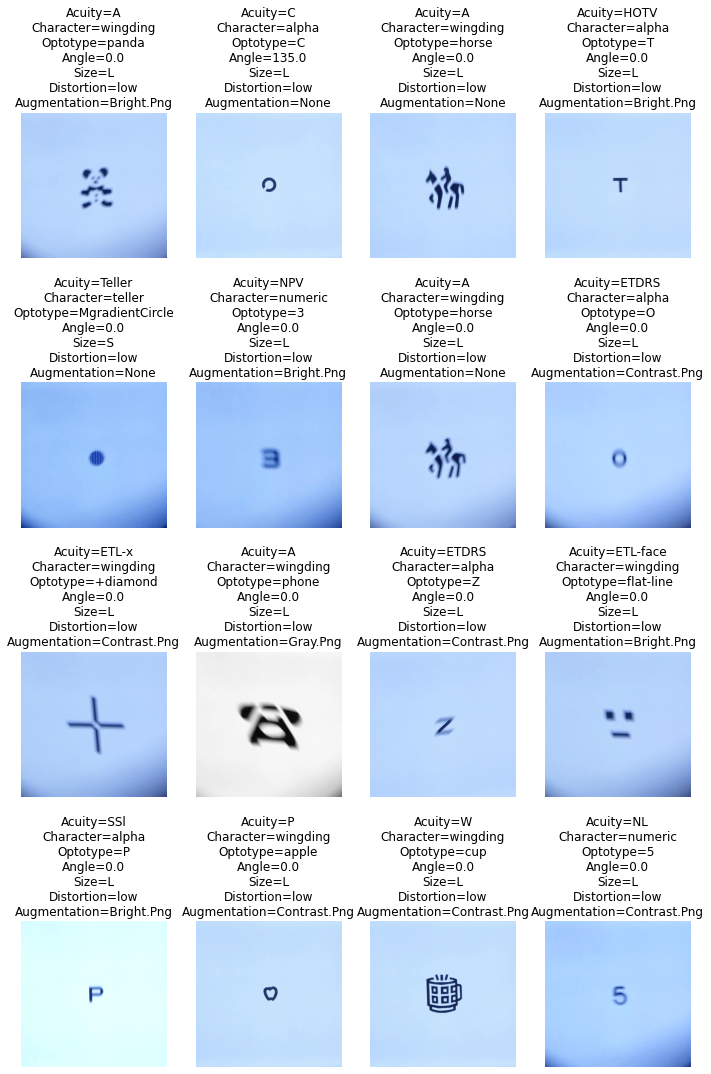

In [8]:
fig, ax = plt.subplots(4, 4, figsize=(12, 19))

for a in ax.ravel():
    test_random_index(training_dataset, a)

plt.show()

## Testing Dataset

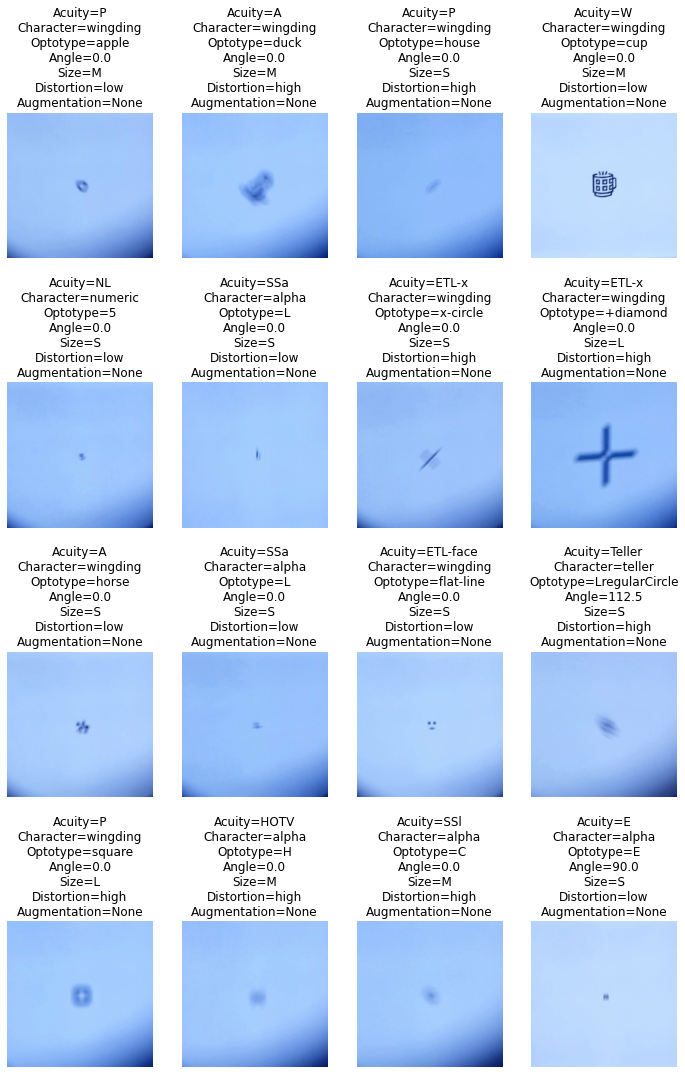

In [10]:
fig, ax = plt.subplots(4, 4, figsize=(12, 19))

for a in ax.ravel():
    test_random_index(testing_dataset, a)

plt.show()